In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.cluster import KMeans

In [17]:
data = pd.read_csv('shopping_trends_updated.csv')

In [18]:
data.head()

Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping Type Discount Applied Promo Code Used  Previous Purchases  \
0        Express              Yes             Yes                  14   
1        Express              Yes             Yes                   2   
2  Free Shipping              Yes             Yes                  23   
3   Next Day Air              Yes             Yes                  49   
4  Free Shipping              Yes             Yes                  31   

  Payment Method Frequency of Purchases  
0          Venmo            Fortnightly  
1           Cash            Fortnightly  
2    Credit Card                 Weekly  
3         PayPal                 Weekly  
4         PayPal               Annually

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [20]:
data.describe()

Customer ID          Age  Purchase Amount (USD)  Review Rating  \
count  3900.000000  3900.000000            3900.000000    3900.000000   
mean   1950.500000    44.068462              59.764359       3.749949   
std    1125.977353    15.207589              23.685392       0.716223   
min       1.000000    18.000000              20.000000       2.500000   
25%     975.750000    31.000000              39.000000       3.100000   
50%    1950.500000    44.000000              60.000000       3.700000   
75%    2925.250000    57.000000              81.000000       4.400000   
max    3900.000000    70.000000             100.000000       5.000000   

       Previous Purchases  
count         3900.000000  
mean            25.351538  
std             14.447125  
min              1.000000  
25%             13.000000  
50%             25.000000  
75%             38.000000  
max             50.000000

In [21]:
data.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

## EDA

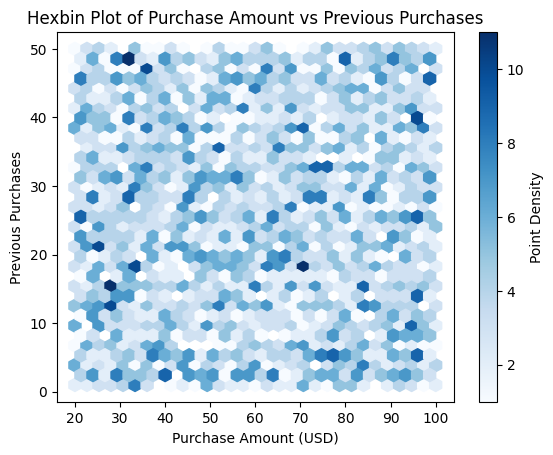

In [22]:
plt.hexbin(data['Purchase Amount (USD)'], data['Previous Purchases'], gridsize=30, cmap='Blues', mincnt=1)
plt.colorbar(label='Point Density')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Previous Purchases')
plt.title('Hexbin Plot of Purchase Amount vs Previous Purchases')
plt.show()


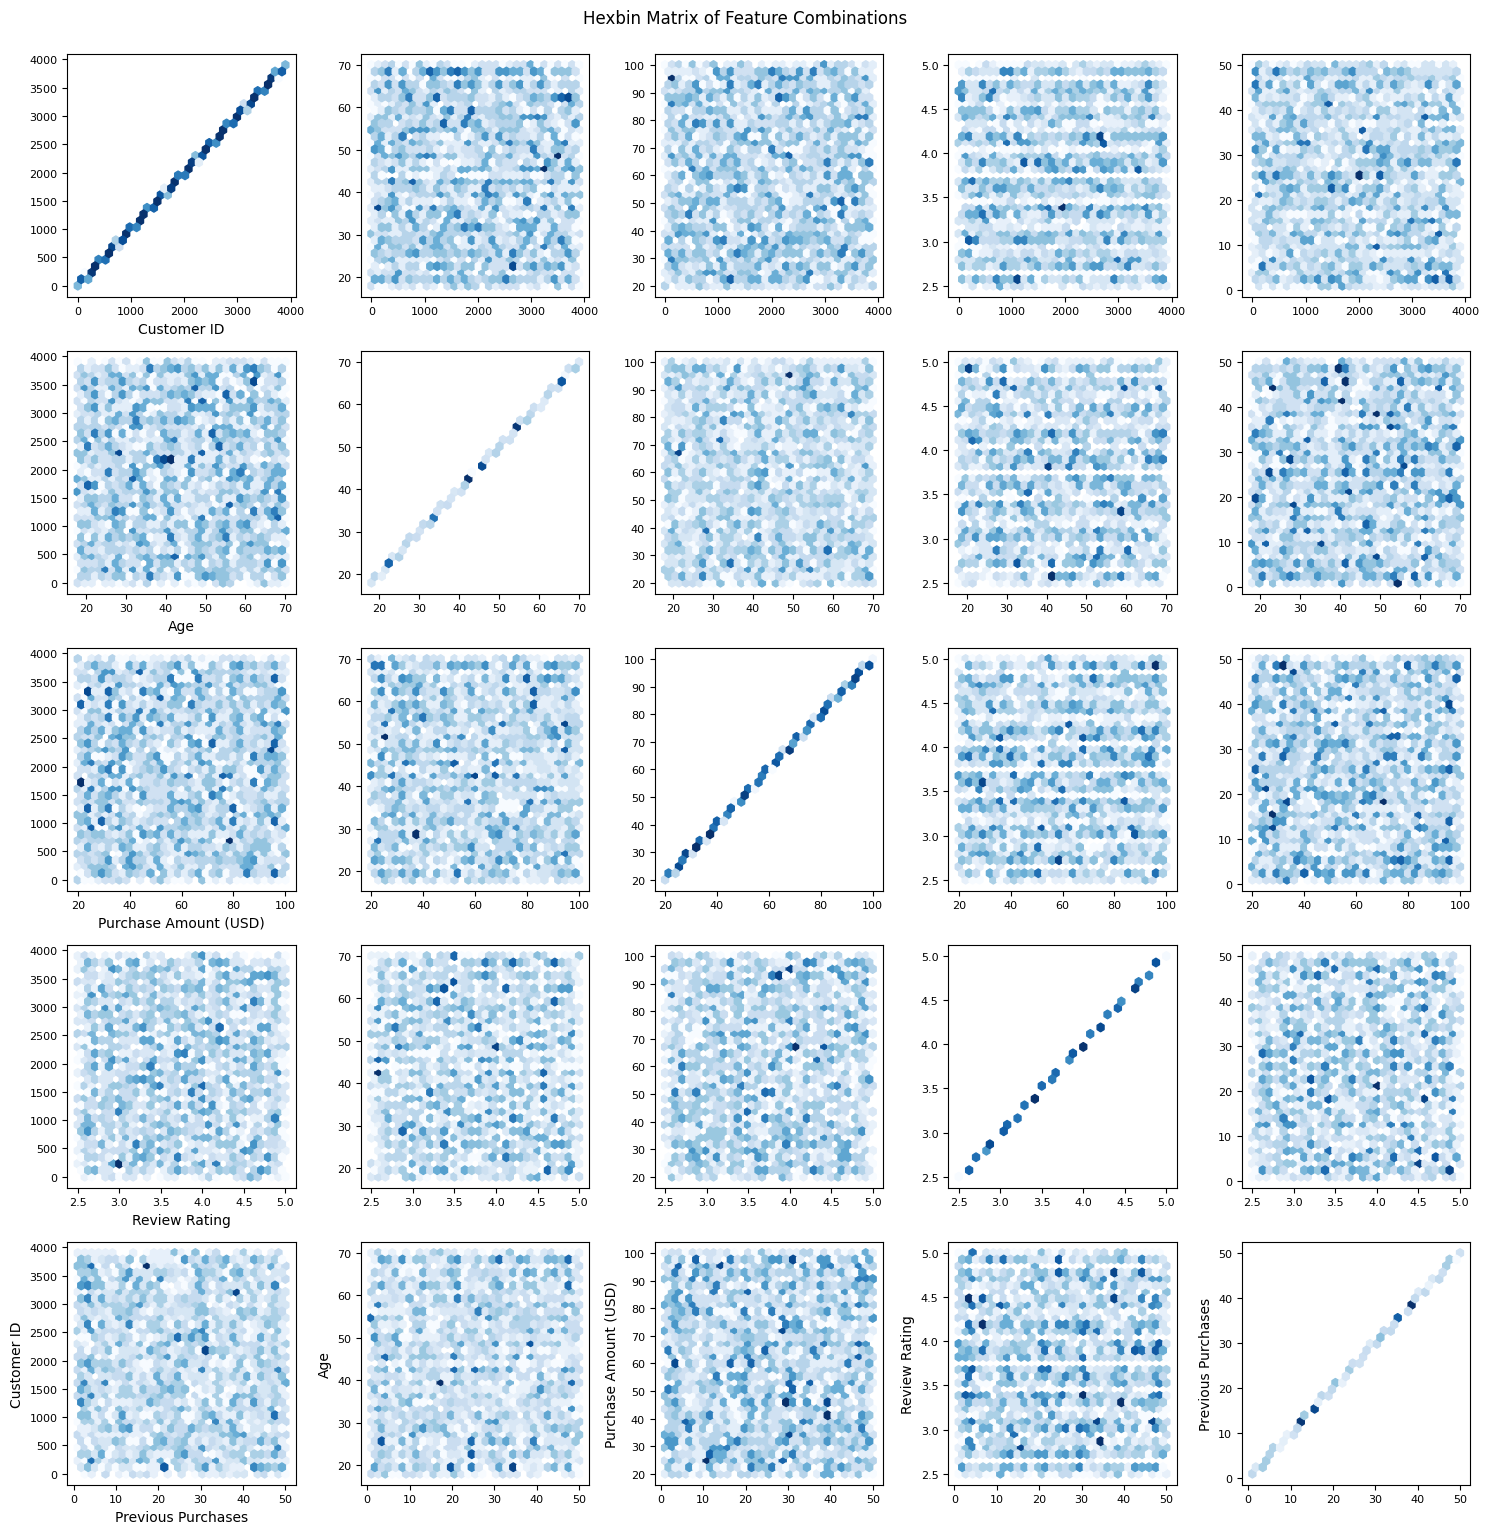

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
from itertools import combinations

# Only numerical features from the data
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns

# Hexbin plots for all feature combinations
fig, axes = plt.subplots(len(numerical_features), len(numerical_features), figsize=(15, 15), sharex=False, sharey=False)

for i, feature_x in enumerate(numerical_features):
    for j, feature_y in enumerate(numerical_features):
        ax = axes[i, j]
        #if i == j:
          #  ax.text(0.5, 0.5, feature_x, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
           # ax.axis('off')  # Remove axis for diagonal
            # Hexbin for feature pairs
        ax.hexbin(data[feature_x], data[feature_y], gridsize=30, cmap='Blues', mincnt=1)
        ax.set_xlabel(feature_x if j == 0 else '')
        ax.set_ylabel(feature_y if i == len(numerical_features) - 1 else '')
        ax.tick_params(labelsize=8)

plt.tight_layout()
plt.suptitle("Hexbin Matrix of Feature Combinations", y=1.02)
plt.show()


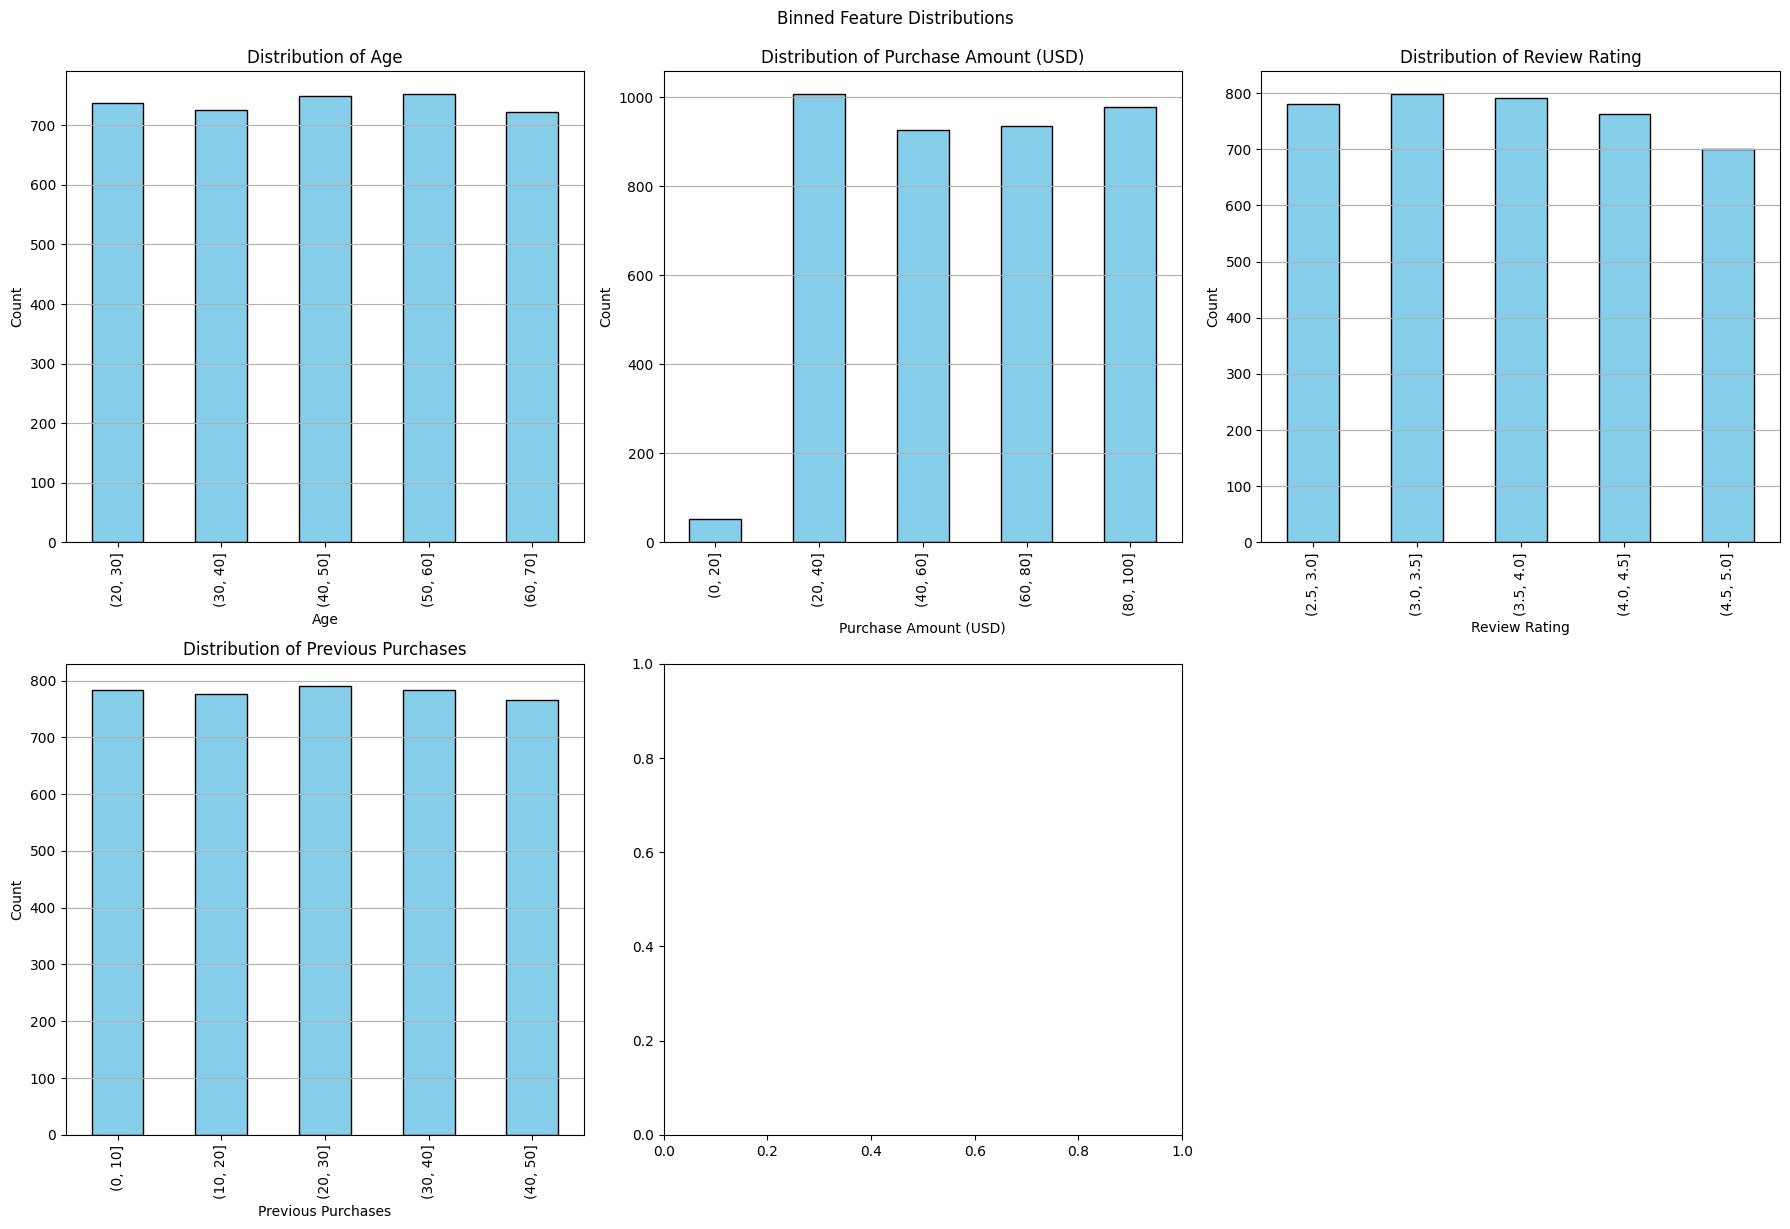

In [24]:

# Bin ranges for each feature
bin_dict = {
    'Age': range(20, 80, 10),  # Bins for age (20–30, 30–40, ...)
    'Purchase Amount (USD)': range(0, 120, 20),  # Bins for purchase amount
    'Review Rating': [2.5, 3, 3.5, 4, 4.5, 5],  # Fixed bins for review rating
    'Previous Purchases': range(0, 60, 10)  # Bins for previous purchases
}

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, (feature, bins) in enumerate(bin_dict.items()):
    # Bin the data
    binned_data = pd.cut(data[feature], bins=bins)

    binned_data.value_counts(sort=False).plot.bar(
        ax=axes[i], color='skyblue', edgecolor='black'
    )
    axes[i].set_title(f"Distribution of {feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Count")
    axes[i].grid(axis='y')

# Remove unused subplot
if len(bin_dict) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.suptitle("Binned Feature Distributions", y=1.02)
plt.show()


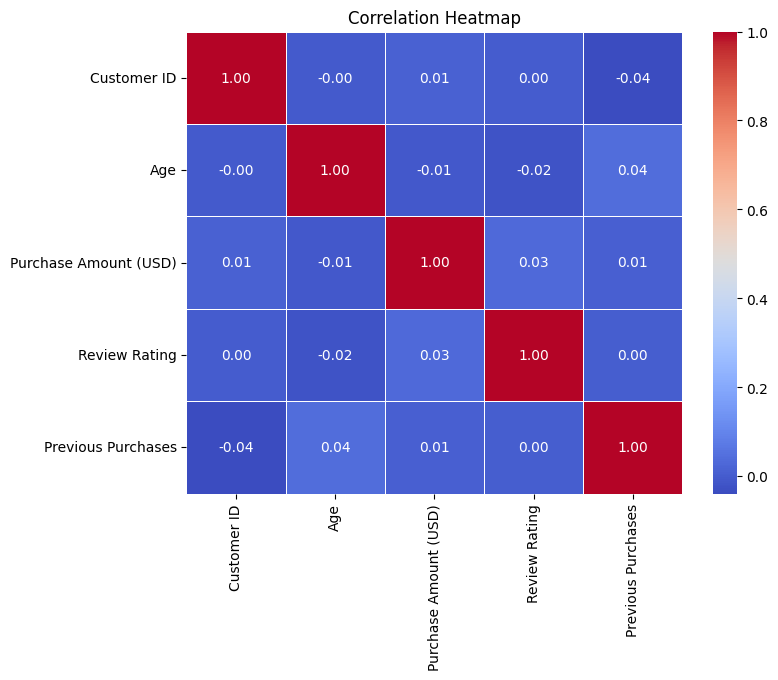

In [27]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Correlation matrix and heatmap
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(8, 6))
sn.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


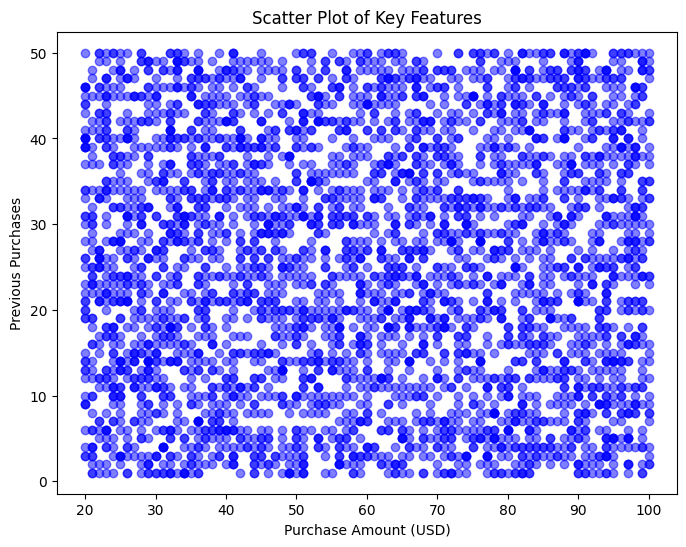

In [28]:
# Scatter plot for key features
plt.figure(figsize=(8, 6))
plt.scatter(data['Purchase Amount (USD)'], data['Previous Purchases'], alpha=0.5, c='blue')
plt.xlabel("Purchase Amount (USD)")
plt.ylabel("Previous Purchases")
plt.title("Scatter Plot of Key Features")
plt.show()


In [29]:
cols = data[['Purchase Amount (USD)','Previous Purchases']]

In [30]:
cols

Purchase Amount (USD)  Previous Purchases
0                        53                  14
1                        64                   2
2                        73                  23
3                        90                  49
4                        49                  31
...                     ...                 ...
3895                     28                  32
3896                     49                  41
3897                     33                  24
3898                     77                  24
3899                     81                  33

[3900 rows x 2 columns]

In [31]:
# Optimal no. of clusters using WCSS (Within cluster sum of squares)

In [32]:
# Calculate WCSS for different number of clusters and take the best one.

In [33]:
wcss_scores =[]
for i in range(1,16):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(cols)
    wcss_scores.append(kmeans.inertia_)

In [34]:
# Elbow graph to find optimal no. of clusters

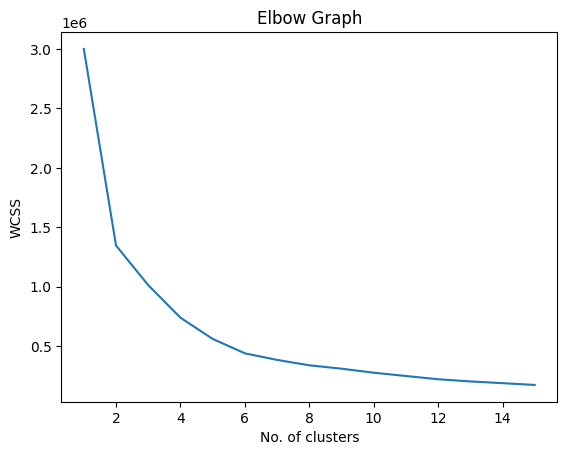

In [35]:
plt.plot(range(1,16), wcss_scores)
plt.title('Elbow Graph')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.show()

In [36]:
# Let's consider number of clusters as 6 as after 6 there's no significant drop in value

In [37]:
# Training the k-means clustering model (unspervised)

In [38]:
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
clstrs = kmeans.fit_predict(cols)
clstrs

array([2, 2, 3, ..., 5, 3, 0], dtype=int32)

In [39]:
cols['Cluster']=clstrs

C:\Users\bhanu\AppData\Local\Temp\ipykernel_19252\2393729615.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cols['Cluster']=clstrs


In [40]:
cols

Purchase Amount (USD)  Previous Purchases  Cluster
0                        53                  14        2
1                        64                   2        2
2                        73                  23        3
3                        90                  49        0
4                        49                  31        1
...                     ...                 ...      ...
3895                     28                  32        4
3896                     49                  41        1
3897                     33                  24        5
3898                     77                  24        3
3899                     81                  33        0

[3900 rows x 3 columns]

In [41]:
cols = cols.drop('Cluster', axis=1)
cols

Purchase Amount (USD)  Previous Purchases
0                        53                  14
1                        64                   2
2                        73                  23
3                        90                  49
4                        49                  31
...                     ...                 ...
3895                     28                  32
3896                     49                  41
3897                     33                  24
3898                     77                  24
3899                     81                  33

[3900 rows x 2 columns]

In [42]:
# Cluster visualization

In [43]:
# Plotting the centroids of the clusters

In [44]:

cols_array = cols.values  # Convert DataFrame to NumPy array


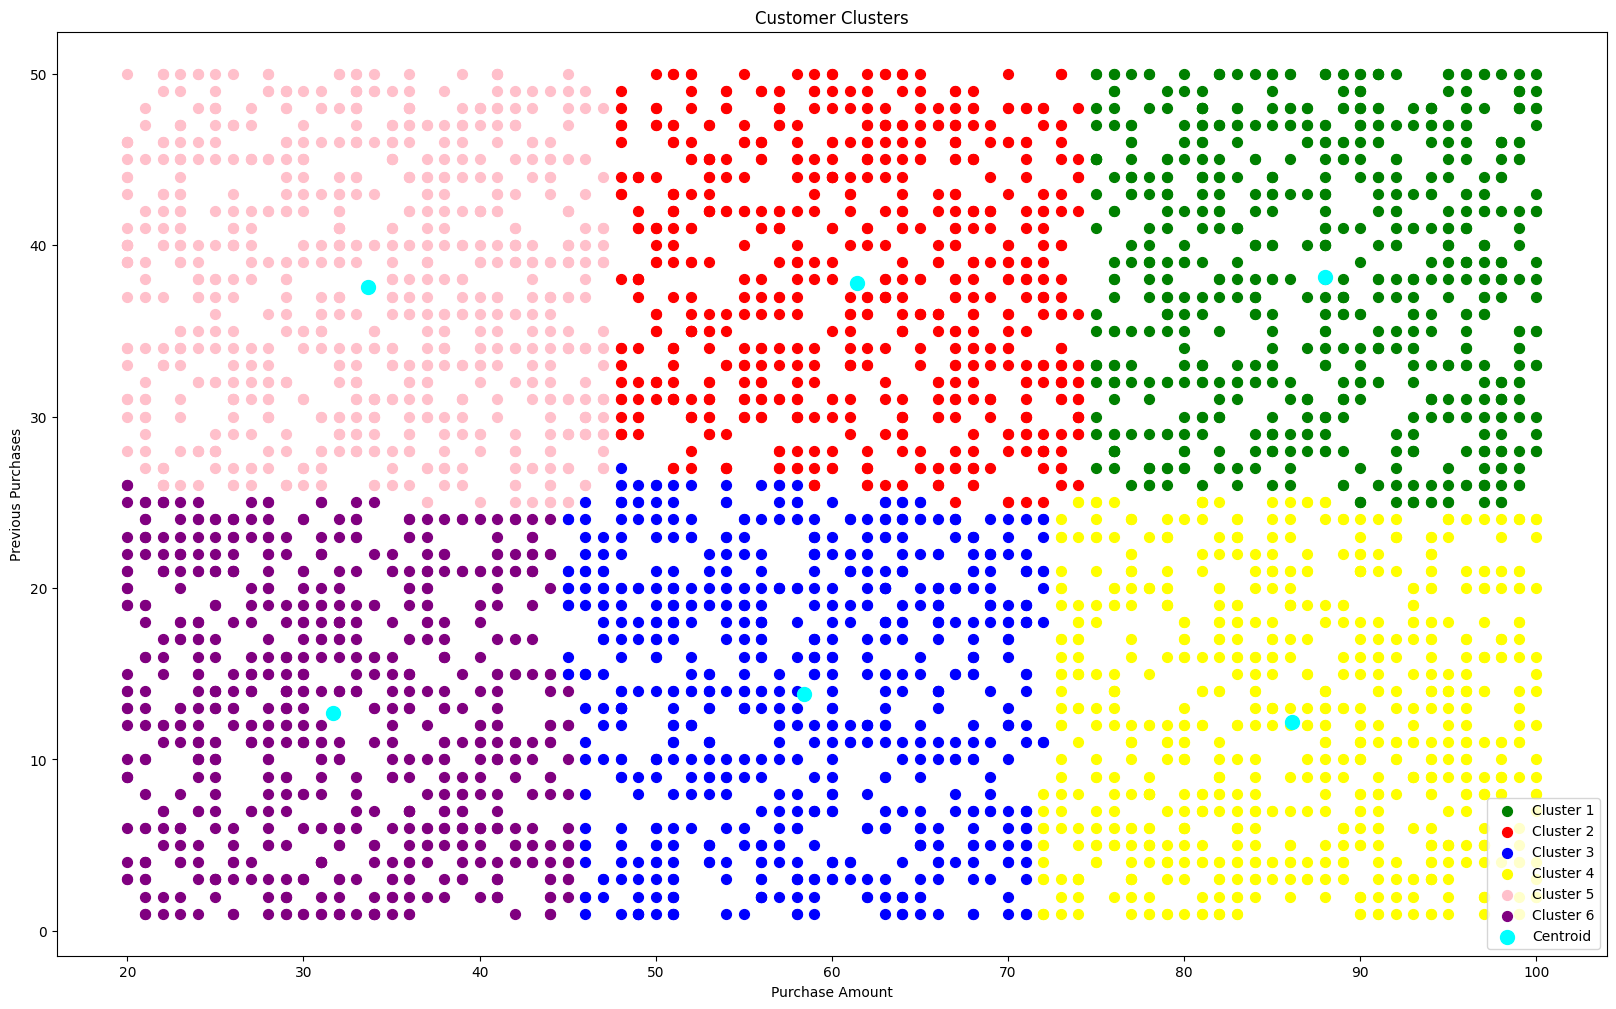

In [45]:
plt.figure(figsize=(20, 12))
plt.scatter(cols_array[clstrs == 0, 0], cols_array[clstrs == 0, 1], s=50, c='green', label='Cluster 1')
plt.scatter(cols_array[clstrs == 1, 0], cols_array[clstrs == 1, 1], s=50, c='red', label='Cluster 2')
plt.scatter(cols_array[clstrs == 2, 0], cols_array[clstrs == 2, 1], s=50, c='blue', label='Cluster 3')
plt.scatter(cols_array[clstrs == 3, 0], cols_array[clstrs == 3, 1], s=50, c='yellow', label='Cluster 4')
plt.scatter(cols_array[clstrs == 4, 0], cols_array[clstrs == 4, 1], s=50, c='pink', label='Cluster 5')
plt.scatter(cols_array[clstrs == 5, 0], cols_array[clstrs == 5, 1], s=50, c='purple', label='Cluster 6')

# Plotting the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='cyan', label='Centroid')

plt.title('Customer Clusters')
plt.xlabel('Purchase Amount')
plt.ylabel('Previous Purchases')
plt.legend()
plt.show()


# DBSCAN

In [46]:
from sklearn.preprocessing import StandardScaler


Standardized Data:
[[-0.28562864 -0.78583067]
 [ 0.17885219 -1.61655226]
 [ 0.55888195 -0.16278948]
 [ 1.27671595  1.63710729]
 [-0.45453076  0.39102491]]


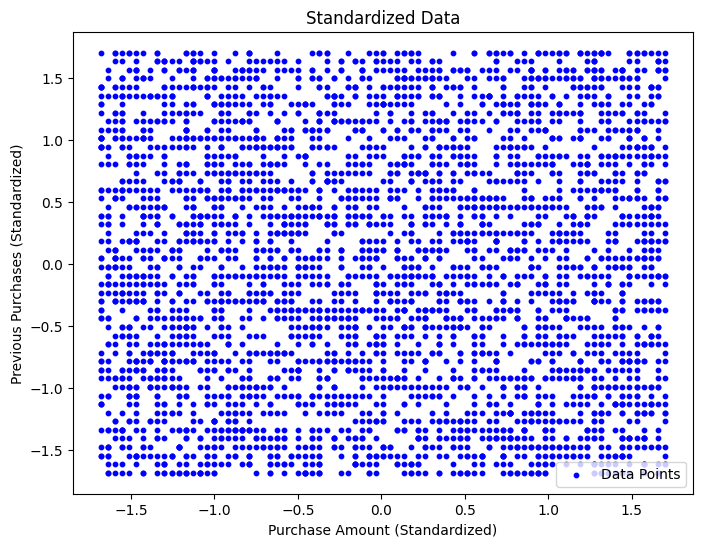

In [47]:
# Standardize the data
scaler = StandardScaler()
cols_scaled = scaler.fit_transform(cols)

# Transformed data
print("Standardized Data:")
print(cols_scaled[:5])  # Display the first 5 rows

# Standardized data plot
plt.figure(figsize=(8, 6))
plt.scatter(cols_scaled[:, 0], cols_scaled[:, 1], s=10, c='blue', label='Data Points')
plt.title('Standardized Data')
plt.xlabel('Purchase Amount (Standardized)')
plt.ylabel('Previous Purchases (Standardized)')
plt.legend()
plt.show()

In [48]:
from sklearn.cluster import DBSCAN

# Perform DBSCAN clustering
db = DBSCAN(eps=0.3, min_samples=10).fit(cols_scaled)
labels = db.labels_

# Calculate the number of clusters and noise points
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(f"Estimated number of clusters: {n_clusters_}")
print(f"Estimated number of noise points: {n_noise_}")


Estimated number of clusters: 1
Estimated number of noise points: 0


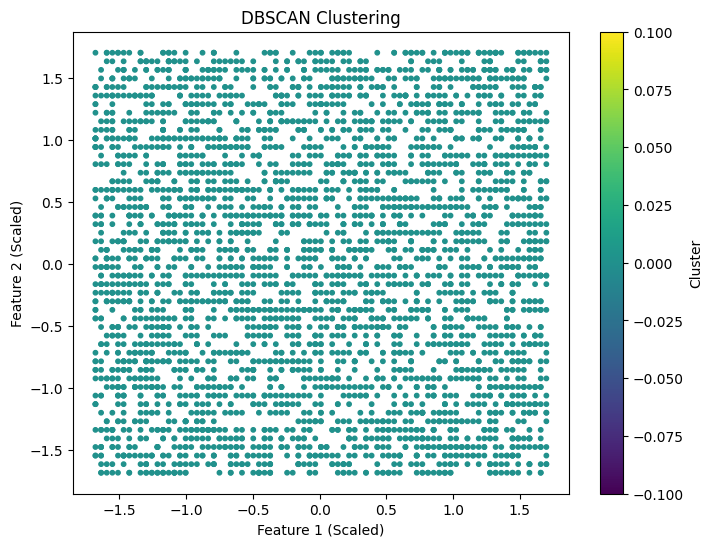

In [49]:
import matplotlib.pyplot as plt

# Scatter plot to visualize clustering
plt.figure(figsize=(8, 6))
plt.scatter(cols_scaled[:, 0], cols_scaled[:, 1], c=labels, cmap='viridis', s=10)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.colorbar(label='Cluster')
plt.show()


In [50]:
from sklearn.metrics import silhouette_score

best_eps = None
best_min_samples = None
best_silhouette = -1

for eps in np.arange(0.05, 0.5, 0.05):
    for min_samples in range(3, 15):
        db = DBSCAN(eps=eps, min_samples=min_samples).fit(cols_scaled)
        labels = db.labels_
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        
        if n_clusters > 1:
            silhouette = silhouette_score(cols_scaled, labels, metric='euclidean')
            if silhouette > best_silhouette:
                best_eps = eps
                best_min_samples = min_samples
                best_silhouette = silhouette

print(f"Best eps: {best_eps}, Best min_samples: {best_min_samples}, Best Silhouette Score: {best_silhouette}")


Best eps: 0.05, Best min_samples: 3, Best Silhouette Score: 0.12524838256718954


In [51]:
from sklearn.cluster import DBSCAN

# Perform DBSCAN clustering
db = DBSCAN(eps=0.1, min_samples=10).fit(cols_scaled)
labels = db.labels_

# Calculate the number of clusters and noise points
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(f"Estimated number of clusters: {n_clusters_}")
print(f"Estimated number of noise points: {n_noise_}")


Estimated number of clusters: 16
Estimated number of noise points: 162


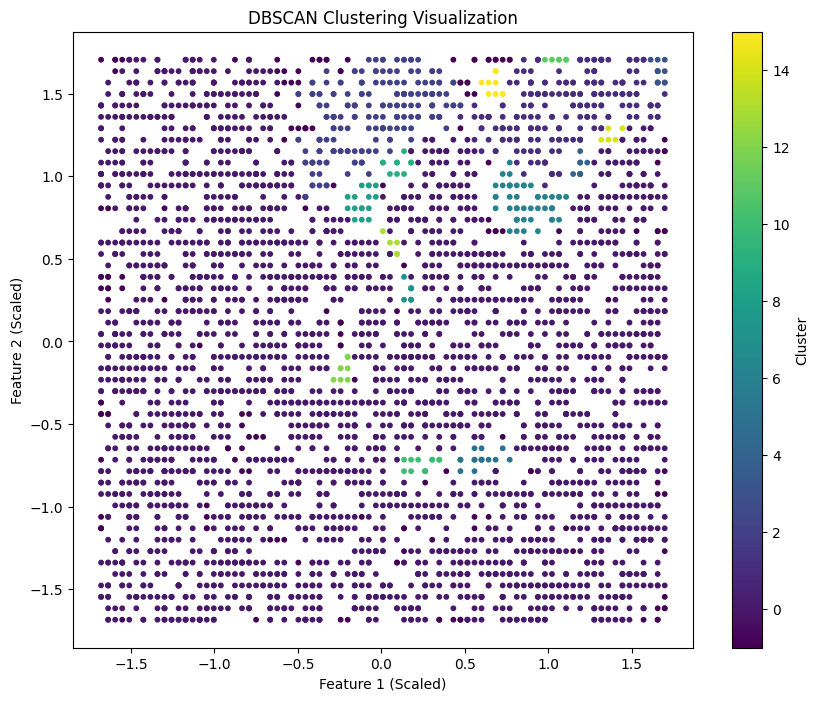

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(cols_scaled[:, 0], cols_scaled[:, 1], c=labels, cmap='viridis', s=10)
plt.title('DBSCAN Clustering Visualization')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.colorbar(label='Cluster')
plt.show()


In [53]:
from collections import Counter

cluster_sizes = Counter(labels)
print("Cluster Sizes:", cluster_sizes)


Cluster Sizes: Counter({np.int64(0): 3179, np.int64(1): 206, np.int64(2): 192, np.int64(-1): 162, np.int64(6): 46, np.int64(8): 16, np.int64(5): 15, np.int64(10): 13, np.int64(3): 12, np.int64(9): 10, np.int64(4): 9, np.int64(15): 9, np.int64(12): 8, np.int64(7): 7, np.int64(11): 6, np.int64(13): 5, np.int64(14): 5})


In [54]:
from sklearn.metrics import silhouette_score

if len(set(labels)) > 1:
    silhouette = silhouette_score(cols_scaled, labels)
    print(f"Silhouette Score: {silhouette}")
else:
    print("Cannot compute silhouette score with only one cluster.")


Silhouette Score: -0.47404663820546


In [55]:

best_eps = None
best_min_samples = None
best_silhouette = -1
best_n_clusters = 0
best_n_noise = float('inf')

# Define thresholds for clusters and noise
max_clusters = 10  # Set a reasonable maximum number of clusters
max_noise_percent = 0.2  # Allow up to 20% noise

for eps in np.arange(0.05, 0.5, 0.05):
    for min_samples in range(3, 15):
        db = DBSCAN(eps=eps, min_samples=min_samples).fit(cols_scaled)
        labels = db.labels_
        
        # Calculate number of clusters and noise points
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)
        noise_percent = n_noise / len(cols_scaled)

        # Skip if clusters or noise points are not within acceptable ranges
        if n_clusters <= 1 or n_clusters > max_clusters or noise_percent > max_noise_percent:
            continue

        # Compute silhouette score for valid configurations
        silhouette = silhouette_score(cols_scaled, labels, metric='euclidean')
        
        # Update best parameters based on silhouette score, clusters, and noise
        if silhouette > best_silhouette:
            best_eps = eps
            best_min_samples = min_samples
            best_silhouette = silhouette
            best_n_clusters = n_clusters
            best_n_noise = n_noise

# Print the best results
print(f"Best eps: {best_eps}")
print(f"Best min_samples: {best_min_samples}")
print(f"Best Silhouette Score: {best_silhouette}")
print(f"Resulting number of clusters: {best_n_clusters}")
print(f"Noise Points: {best_n_noise}, Percentage: {(best_n_noise / len(cols_scaled)) * 100:.2f}%")


Best eps: 0.1
Best min_samples: 7
Best Silhouette Score: -0.05490996531531628
Resulting number of clusters: 2
Noise Points: 9, Percentage: 0.23%


In [56]:
best_eps = None
best_min_samples = None
best_silhouette = -1
best_n_clusters = 0
best_n_noise = float('inf')

# Define thresholds for clusters and noise
max_clusters = 10  # Set a reasonable maximum number of clusters
max_noise_percent = 0.2  # Allow up to 20% noise

# You can define a penalty for noise (optional) if you want to give more importance to minimizing noise
noise_penalty_factor = 0.5  # Adjust this value to give more or less weight to noise points

for eps in np.arange(0.05, 0.5, 0.05):
    for min_samples in range(3, 15):
        db = DBSCAN(eps=eps, min_samples=min_samples).fit(cols_scaled)
        labels = db.labels_
        
        # Calculate number of clusters and noise points
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)
        noise_percent = n_noise / len(cols_scaled)

        # Skip if clusters or noise points are not within acceptable ranges
        if n_clusters <= 1 or n_clusters > max_clusters or noise_percent > max_noise_percent:
            continue

        # Compute silhouette score for valid configurations
        silhouette = silhouette_score(cols_scaled, labels, metric='euclidean')
        
        # Compute a composite score that considers both silhouette and noise
        # For example, penalize higher noise with a factor
        composite_score = silhouette - (noise_percent * noise_penalty_factor)
        
        # Update best parameters based on the composite score, clusters, and noise
        if composite_score > best_silhouette:
            best_eps = eps
            best_min_samples = min_samples
            best_silhouette = composite_score
            best_n_clusters = n_clusters
            best_n_noise = n_noise

# Print the best results
print(f"Best eps: {best_eps}")
print(f"Best min_samples: {best_min_samples}")
print(f"Best Composite Score: {best_silhouette}")
print(f"Resulting number of clusters: {best_n_clusters}")
print(f"Noise Points: {best_n_noise}, Percentage: {(best_n_noise / len(cols_scaled)) * 100:.2f}%")


Best eps: 0.1
Best min_samples: 7
Best Composite Score: -0.05606381146916243
Resulting number of clusters: 2
Noise Points: 9, Percentage: 0.23%


In [57]:
best_eps = None
best_min_samples = None
best_silhouette = -1
best_n_clusters = 0
best_n_noise = float('inf')

# Define thresholds for clusters and noise
min_clusters = 3  # Minimum number of clusters
max_clusters = 5  # Maximum number of clusters
max_noise_percent = 0.2  # Allow up to 20% noise

# You can define a penalty for noise (optional) if you want to give more importance to minimizing noise
noise_penalty_factor = 0.5  # Adjust this value to give more or less weight to noise points

for eps in np.arange(0.05, 0.5, 0.05):
    for min_samples in range(3, 15):
        db = DBSCAN(eps=eps, min_samples=min_samples).fit(cols_scaled)
        labels = db.labels_
        
        # Calculate number of clusters and noise points
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)
        noise_percent = n_noise / len(cols_scaled)

        # Skip if clusters or noise points are not within acceptable ranges
        if n_clusters < min_clusters or n_clusters > max_clusters or noise_percent > max_noise_percent:
            continue

        # Compute silhouette score for valid configurations
        silhouette = silhouette_score(cols_scaled, labels, metric='euclidean')
        
        # Update best parameters based on the composite score, clusters, and noise
        if composite_score > best_silhouette:
            best_eps = eps
            best_min_samples = min_samples
            best_silhouette = silhouette
            best_n_clusters = n_clusters
            best_n_noise = n_noise

# Print the best results
print(f"Best eps: {best_eps}")
print(f"Best min_samples: {best_min_samples}")
print(f"Best Silhouette Score: {best_silhouette}")
print(f"Resulting number of clusters: {best_n_clusters}")
print(f"Noise Points: {best_n_noise}, Percentage: {(best_n_noise / len(cols_scaled)) * 100:.2f}%")


Best eps: 0.1
Best min_samples: 8
Best Silhouette Score: -0.18696740785988814
Resulting number of clusters: 3
Noise Points: 17, Percentage: 0.44%


# Guasian Mixture Model

In [58]:
from sklearn.mixture import GaussianMixture

# Fit Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
labels = gmm.fit_predict(cols_scaled)

# Calculate Silhouette Score
silhouette = silhouette_score(cols_scaled, labels, metric='euclidean')
print(f"Gaussian Mixture Model Silhouette Score: {silhouette}")


Gaussian Mixture Model Silhouette Score: 0.3735400545781328


In [59]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# Set a range for the number of components (clusters)
min_clusters = 3
max_clusters = 10
best_n_clusters = None
best_gmm = None
best_silhouette = -1
best_labels = None

for n_clusters in range(min_clusters, max_clusters + 1):
    # Fit Gaussian Mixture Model
    gmm = GaussianMixture(n_components=n_clusters, covariance_type='full', random_state=42)
    labels = gmm.fit_predict(cols_scaled)
    
    # Calculate Silhouette Score
    silhouette = silhouette_score(cols_scaled, labels, metric='euclidean')
    print(f"Clusters: {n_clusters}, Silhouette Score: {silhouette}")
    
    # Keep track of the best model
    if silhouette > best_silhouette:
        best_n_clusters = n_clusters
        best_gmm = gmm
        best_silhouette = silhouette
        best_labels = labels

# Print the best result
print(f"\nOptimal Number of Clusters: {best_n_clusters}")
print(f"Best Silhouette Score: {best_silhouette}")

Clusters: 3, Silhouette Score: 0.3735400545781328
Clusters: 4, Silhouette Score: 0.40951198716101356
Clusters: 5, Silhouette Score: 0.381743886597651
Clusters: 6, Silhouette Score: 0.3641294353665866
Clusters: 7, Silhouette Score: 0.3556756707468286
Clusters: 8, Silhouette Score: 0.34579220563806434
Clusters: 9, Silhouette Score: 0.3736368769483753
Clusters: 10, Silhouette Score: 0.2849169912163159

Optimal Number of Clusters: 4
Best Silhouette Score: 0.40951198716101356


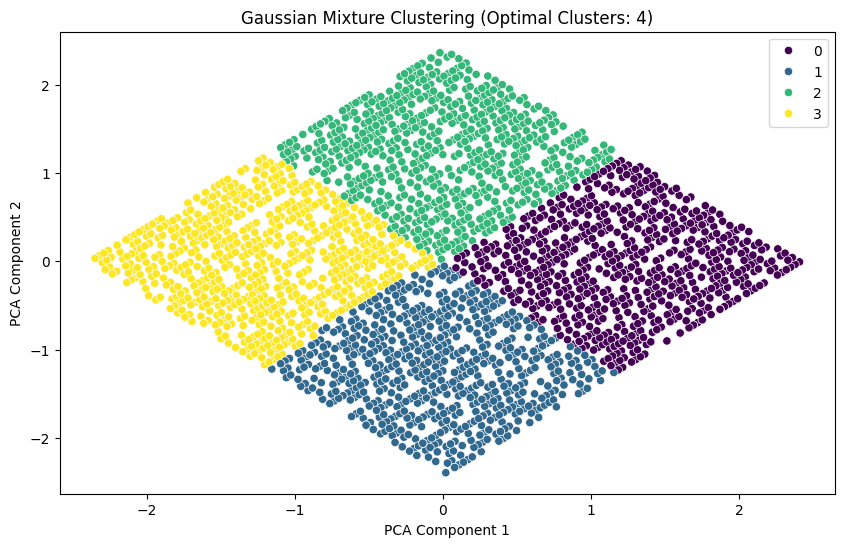

In [60]:
import seaborn as sns
from sklearn.decomposition import PCA

# Reduce dimensions for visualization
pca = PCA(n_components=2)
cols_reduced = pca.fit_transform(cols_scaled)

# Scatter plot of clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=cols_reduced[:, 0],
    y=cols_reduced[:, 1],
    hue=best_labels,
    palette="viridis",
    legend="full"
)
plt.title(f"Gaussian Mixture Clustering (Optimal Clusters: {best_n_clusters})")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


In [61]:
# Cluster 0: Customers who shop once in a while but their purchase price is very high (company generates most of the profits from these)
# Cluster 1: New or infrequent customers with moderate purchase price 
# Cluster 2: Frequent customers with moderate purchase price (loyal customers but spend less on each transaction)
# Cluster 3: Customers who shop once in a while but the purchase price is very low

In [62]:
# Based on these clusters the company can tailor the promotions and offers. For example,
# Cluster 0: Separate premium outlets, early access, exclusive deals and VIP perks.
# Cluster 1: Offer discounts and coupons for new users to make them use the platform again. Use emails and other marketing to keep them engaged.
# Cluster 2: Encouraging upselling by bundling products together, introducing membership and a few perks with it to retain these users.
# Cluster 3: Send occasional promotions and deals to engage them again.

# Agglomerative Clustering

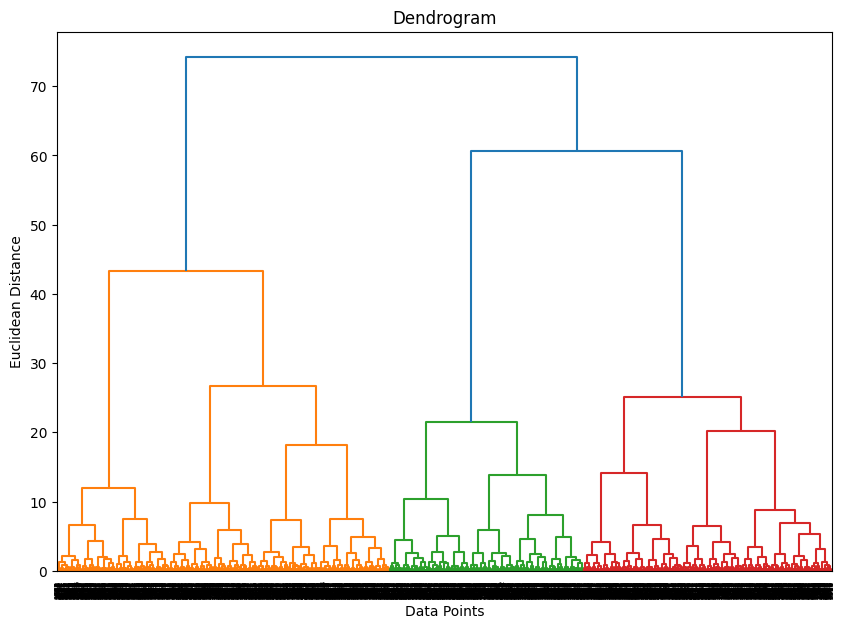

Silhouette Score: 0.36174173514008906


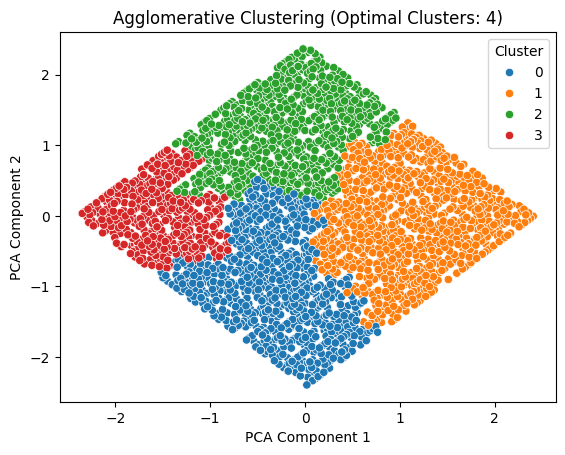

In [63]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca_components = pca.fit_transform(cols_scaled)

# Step 1: Visualize dendrogram
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(cols_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

# Step 2: Fit Agglomerative Clustering
n_clusters = 4  # Based on dendrogram or business logic
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
labels = agg_clustering.fit_predict(cols_scaled)

# Step 3: Evaluate Silhouette Score
silhouette = silhouette_score(cols_scaled, labels)
print(f"Silhouette Score: {silhouette}")

# Step 4: Visualize Clusters
import seaborn as sns
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=labels, palette='tab10')
plt.title(f'Agglomerative Clustering (Optimal Clusters: {n_clusters})')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()


## Comparing GMM and Agglomerative clustering

In [64]:
# Create a DataFrame to store cluster results for both methods
comparison_df = pd.DataFrame(pca_components, columns=['PCA Component 1', 'PCA Component 2'])

# Add labels for Agglomerative Clustering
comparison_df['Agglomerative Cluster'] = labels

# Add labels for GMM
gmm = GaussianMixture(n_components=4, random_state=42)
gmm_labels = gmm.fit_predict(cols_scaled)
comparison_df['GMM Cluster'] = gmm_labels

# Calculate silhouette scores
agg_silhouette = silhouette_score(cols_scaled, labels)
gmm_silhouette = silhouette_score(cols_scaled, gmm_labels)

print(f"Silhouette Score (Agglomerative Clustering): {agg_silhouette}")
print(f"Silhouette Score (GMM): {gmm_silhouette}")


Silhouette Score (Agglomerative Clustering): 0.36174173514008906
Silhouette Score (GMM): 0.40951198716101356


In [65]:
# GMM has a higher score indicating better defined clusters

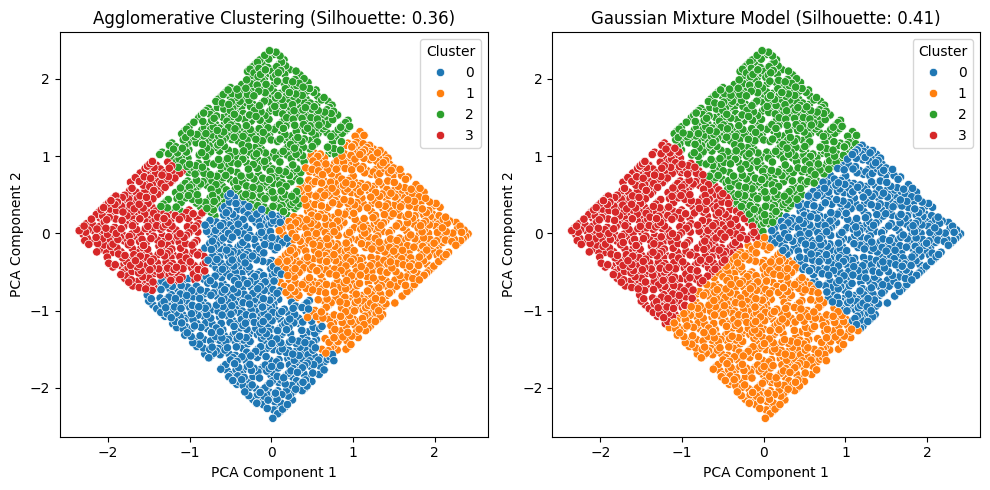

In [66]:
# Visualize Agglomerative Clustering Results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(data=comparison_df, x='PCA Component 1', y='PCA Component 2', hue='Agglomerative Cluster', palette='tab10')
plt.title(f'Agglomerative Clustering (Silhouette: {agg_silhouette:.2f})')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')

# Visualize GMM Results
plt.subplot(1, 2, 2)
sns.scatterplot(data=comparison_df, x='PCA Component 1', y='PCA Component 2', hue='GMM Cluster', palette='tab10')
plt.title(f'Gaussian Mixture Model (Silhouette: {gmm_silhouette:.2f})')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')

plt.tight_layout()
plt.show()

In [67]:
# GMM has more well-defined clusters

In [68]:
# Add the original features to the DataFrame for analysis
original_features = pd.DataFrame(cols_scaled, columns=['Purchase Price', 'Previous Purchases'])
comparison_df = pd.concat([comparison_df, original_features], axis=1)

# Group by clusters and calculate mean feature values
print("Agglomerative Clustering Cluster Characteristics:")
print(comparison_df.groupby('Agglomerative Cluster')[['Purchase Price', 'Previous Purchases']].mean())

print("\nGMM Cluster Characteristics:")
print(comparison_df.groupby('GMM Cluster')[['Purchase Price', 'Previous Purchases']].mean())


Agglomerative Clustering Cluster Characteristics:
                       Purchase Price  Previous Purchases
Agglomerative Cluster                                    
0                           -0.912088            0.481144
1                            0.729305            0.841415
2                            0.726485           -0.992304
3                           -1.072098           -1.090991

GMM Cluster Characteristics:
             Purchase Price  Previous Purchases
GMM Cluster                                    
0                  0.855229            0.894372
1                 -0.874515            0.826645
2                  0.881574           -0.855345
3                 -0.867350           -0.876885


In [69]:
# The z-scores are slightly higher in GMM clusters, indicating that GMM may have more distinct separation between clusters.

In [70]:
print(comparison_df['Agglomerative Cluster'].value_counts())
print(comparison_df['GMM Cluster'].value_counts())


Agglomerative Cluster
1    1249
0    1110
2     975
3     566
Name: count, dtype: int64
GMM Cluster
0    989
3    980
1    967
2    964
Name: count, dtype: int64


In [71]:
# In agglomerative clustering, cluster sizes are more imbalanced and the large difference in cluster sizes may make the interpretation skewed and 
# harder to act upon.

In [72]:
# In GMM, the clusters are more balanced and captures the groups more evenly and simplifies decision making.

In [74]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

def evaluate_clustering(data, cluster_labels, method_name):
    silhouette_avg = silhouette_score(data, cluster_labels)
    davies_bouldin = davies_bouldin_score(data, cluster_labels)
    calinski_harabasz = calinski_harabasz_score(data, cluster_labels)
    
    print(f"Evaluation Metrics for {method_name}:")
    print(f"Silhouette Score: {silhouette_avg:.3f}")
    print(f"Davies-Bouldin Index: {davies_bouldin:.3f}")
    print(f"Calinski-Harabasz Score: {calinski_harabasz:.3f}")
    
    return [method_name, silhouette_avg, davies_bouldin, calinski_harabasz]


In [75]:
# Step 1: Encode categorical data
data_encoded = pd.get_dummies(data, drop_first=True)

# Step 2: Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_encoded)

# Step 3: Perform clustering and evaluation
kmeans_labels = kmeans.labels_
kmeans_results = evaluate_clustering(data_scaled, kmeans_labels, "K-Means")


Evaluation Metrics for K-Means:
Silhouette Score: 0.001
Davies-Bouldin Index: 17.722
Calinski-Harabasz Score: 10.859


In [76]:
from sklearn.decomposition import PCA

# Use the same PCA object as used during training
pca = PCA(n_components=2)  # Ensure n_components matches training
data_pca = pca.fit_transform(cols_scaled)

# Predict using GaussianMixture
gmm_labels = gmm.predict(data_pca)
gmm_results = evaluate_clustering(data_pca, gmm_labels, "GMM")


Evaluation Metrics for GMM:
Silhouette Score: 0.303
Davies-Bouldin Index: 0.924
Calinski-Harabasz Score: 2550.140


In [77]:
agg_labels = agg_clustering.labels_
agg_results = evaluate_clustering(data_scaled, agg_labels, "Agglomerative Clustering")

Evaluation Metrics for Agglomerative Clustering:
Silhouette Score: 0.003
Davies-Bouldin Index: 12.920
Calinski-Harabasz Score: 15.362


For well defined clusters, the Silhouette score should be closer to +1, Davies-Bouldin Score close to 0, and Calinski-Harabasz Score high. 
Based on these we can conclude that Gausian Mixture Model is the best performing model for this dataset, giving well separated clusters
as seen in the visualization

In [78]:
data['GMM Cluster'] = gmm_labels

In [79]:
data['K-Means Labels'] = kmeans_labels

In [80]:
data['Agg Labels'] = agg_labels

In [81]:
data

Customer ID  Age  Gender Item Purchased     Category  \
0               1   55    Male         Blouse     Clothing   
1               2   19    Male        Sweater     Clothing   
2               3   50    Male          Jeans     Clothing   
3               4   21    Male        Sandals     Footwear   
4               5   45    Male         Blouse     Clothing   
...           ...  ...     ...            ...          ...   
3895         3896   40  Female         Hoodie     Clothing   
3896         3897   52  Female       Backpack  Accessories   
3897         3898   46  Female           Belt  Accessories   
3898         3899   44  Female          Shoes     Footwear   
3899         3900   52  Female        Handbag  Accessories   

      Purchase Amount (USD)       Location Size      Color  Season  ...  \
0                        53       Kentucky    L       Gray  Winter  ...   
1                        64          Maine    L     Maroon  Winter  ...   
2                        73  Massachusetts    S     Maroon  Spring  ...   
3                        90   Rhode Island    M     Maroon  Spring  ...   
4                        49         Oregon    M  Turquoise  Spring  ...   
...                     ...            ...  ...        ...     ...  ...   
3895                     28       Virginia    L  Turquoise  Summer  ...   
3896                     49           Iowa    L      White  Spring  ...   
3897                     33     New Jersey    L      Green  Spring  ...   
3898                     77      Minnesota    S      Brown  Summer  ...   
3899                     81     California    M      Beige  Spring  ...   

      Subscription Status   Shipping Type Discount Applied Promo Code Used  \
0                     Yes         Express              Yes             Yes   
1                     Yes         Express              Yes             Yes   
2                     Yes   Free Shipping              Yes             Yes   
3                     Yes    Next Day Air              Yes             Yes   
4                     Yes   Free Shipping              Yes             Yes   
...                   ...             ...              ...             ...   
3895                   No  2-Day Shipping               No              No   
3896                   No    Store Pickup               No              No   
3897                   No        Standard               No              No   
3898                   No         Express               No              No   
3899                   No    Store Pickup               No              No   

     Previous Purchases  Payment Method Frequency of Purchases GMM Cluster  \
0                    14           Venmo            Fortnightly           1   
1                     2            Cash            Fortnightly           1   
2                    23     Credit Card                 Weekly           0   
3                    49          PayPal                 Weekly           2   
4                    31          PayPal               Annually           3   
...                 ...             ...                    ...         ...   
3895                 32           Venmo                 Weekly           3   
3896                 41   Bank Transfer              Bi-Weekly           2   
3897                 24           Venmo              Quarterly           3   
3898                 24           Venmo                 Weekly           0   
3899                 33           Venmo              Quarterly           0   

      K-Means Labels  Agg Labels  
0                  2           2  
1                  2           2  
2                  3           2  
3                  0           1  
4                  1           0  
...              ...         ...  
3895               4           0  
3896               1           1  
3897               5           0  
3898               3           1  
3899               0           1  

[3900 rows x 21 columns]

In [82]:
data.dtypes

Customer ID                 int64
Age                         int64
Gender                     object
Item Purchased             object
Category                   object
Purchase Amount (USD)       int64
Location                   object
Size                       object
Color                      object
Season                     object
Review Rating             float64
Subscription Status        object
Shipping Type              object
Discount Applied           object
Promo Code Used            object
Previous Purchases          int64
Payment Method             object
Frequency of Purchases     object
GMM Cluster                 int64
K-Means Labels              int32
Agg Labels                  int64
dtype: object

In [83]:
agg_cluster_summary = data.groupby('Agg Labels').mean(numeric_only=True)
agg_cluster_summary

Customer ID        Age  Purchase Amount (USD)  Review Rating  \
Agg Labels                                                                 
0           1870.823423  44.751351              38.163964       3.720090   
1           1949.970376  44.286629              77.036029       3.780624   
2           1985.163077  43.261538              76.969231       3.751282   
3           2048.213781  43.637809              34.374558       3.738516   

            Previous Purchases  GMM Cluster  K-Means Labels  
Agg Labels                                                   
0                    32.301802     2.513514        3.536937  
1                    37.506005     1.095276        0.628503  
2                    11.017436     0.581538        2.626667  
3                     9.591873     2.007067        4.618375

In [84]:
kmeans_cluster_summary = data.groupby('K-Means Labels').mean(numeric_only=True)
kmeans_cluster_summary

Customer ID        Age  Purchase Amount (USD)  Review Rating  \
K-Means Labels                                                                 
0               1948.709119  45.183962              87.970126       3.787421   
1               1988.442649  43.901454              61.423263       3.769144   
2               1955.575472  43.452830              58.413522       3.719969   
3               1961.566372  43.261062              86.147493       3.767257   
4               1856.485591  45.064841              33.661383       3.726369   
5               2000.998430  43.505495              31.697017       3.731083   

                Previous Purchases  GMM Cluster  Agg Labels  
K-Means Labels                                               
0                        38.163522     0.679245    1.000000  
1                        37.785137     1.814216    0.870759  
2                        13.838050     1.128931    1.490566  
3                        12.172566     0.352507    1.882006  
4                        37.551873     2.691643    0.005764  
5                        12.708006     2.324961    2.345369

In [85]:
gmm_cluster_summary = data.groupby('GMM Cluster').mean(numeric_only=True)
gmm_cluster_summary

Customer ID        Age  Purchase Amount (USD)  Review Rating  \
GMM Cluster                                                                 
0            1944.872599  44.030334              86.995956       3.767846   
1            1965.294056  43.402503              59.171011       3.755057   
2            1938.147799  44.157233              60.808176       3.760797   
3            1953.668337  44.661323              32.350701       3.716934   

             Previous Purchases  K-Means Labels  Agg Labels  
GMM Cluster                                                  
0                     24.912032        1.523761    1.396360  
1                      8.823775        2.921794    2.061522  
2                     41.975891        1.446541    0.716981  
3                     25.777555        4.205411    0.856713

In [86]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Add the 'Agg Labels' column back if it's missing
numeric_data['GMM Cluster'] = data['GMM Cluster']

In [87]:
# Define the quantiles you want to compute
quantiles = [0.25, 0.5, 0.75]

# Group by 'GMM Cluster' and calculate quantiles
quantile_summary = numeric_data.groupby('GMM Cluster').quantile(quantiles)

# Reset the index to make the DataFrame more readable
quantile_summary = quantile_summary.reset_index()
print(quantile_summary)


    GMM Cluster  level_1  Customer ID   Age  Purchase Amount (USD)  \
0             0     0.25       963.00  31.0                  80.00   
1             0     0.50      1989.00  44.0                  89.00   
2             0     0.75      2926.00  57.0                  95.00   
3             1     0.25       998.50  31.0                  47.00   
4             1     0.50      1888.00  43.0                  59.00   
5             1     0.75      3002.50  56.0                  72.00   
6             2     0.25       959.75  31.0                  50.00   
7             2     0.50      1925.50  44.0                  61.00   
8             2     0.75      2907.25  57.0                  72.75   
9             3     0.25       979.25  31.0                  25.00   
10            3     0.50      1998.50  46.0                  31.00   
11            3     0.75      2894.75  58.0                  38.00   

    Review Rating  Previous Purchases  K-Means Labels  Agg Labels  
0             3.1    

In [88]:
# Compute quantiles
quantile_summary = numeric_data.groupby('GMM Cluster').quantile(quantiles)

# Add quantile level as a column
quantile_summary = quantile_summary.reset_index(level=1)
quantile_summary.rename(columns={'level_1': 'Quantile'}, inplace=True)

print(quantile_summary)

             Quantile  Customer ID   Age  Purchase Amount (USD)  \
GMM Cluster                                                       
0                0.25       963.00  31.0                  80.00   
0                0.50      1989.00  44.0                  89.00   
0                0.75      2926.00  57.0                  95.00   
1                0.25       998.50  31.0                  47.00   
1                0.50      1888.00  43.0                  59.00   
1                0.75      3002.50  56.0                  72.00   
2                0.25       959.75  31.0                  50.00   
2                0.50      1925.50  44.0                  61.00   
2                0.75      2907.25  57.0                  72.75   
3                0.25       979.25  31.0                  25.00   
3                0.50      1998.50  46.0                  31.00   
3                0.75      2894.75  58.0                  38.00   

             Review Rating  Previous Purchases  K-Means Label

Insights:


Age- The age distribution is similar across all the clusters.

Purchase Amount- Cluster 0 has the highest purchase amounts (median of 89), Cluster 1 and 2 have moderate and Cluster 3 has the least purchase amounts (median of 31). So, cluster 0 has high value customers while cluster 3 has low value customers.

Review Rating- The distribution of ratings is similar across all the clusters indicating comparable customer satisfaction across all groups.

Previous Purchases- Cluster 0 has people who purchase a little frequently, and even though customers in cluster 3 don't spend a lot per purchase, they have good number of purchases. Cluster 1 has people who make transactions very rarely and Cluster 2 has people with most purchases.

Cluster 0: High-value customers with higher purchase amounts and moderate previous purchase history. 

Cluster 1: Moderate spenders with low previous purchase history. 

Cluster 2: Moderate spenders but frequent buyers, representing loyal customers with high repeat purchase behavior.

Cluster 3: Low-value customers with low purchase amounts and fewer purchases.

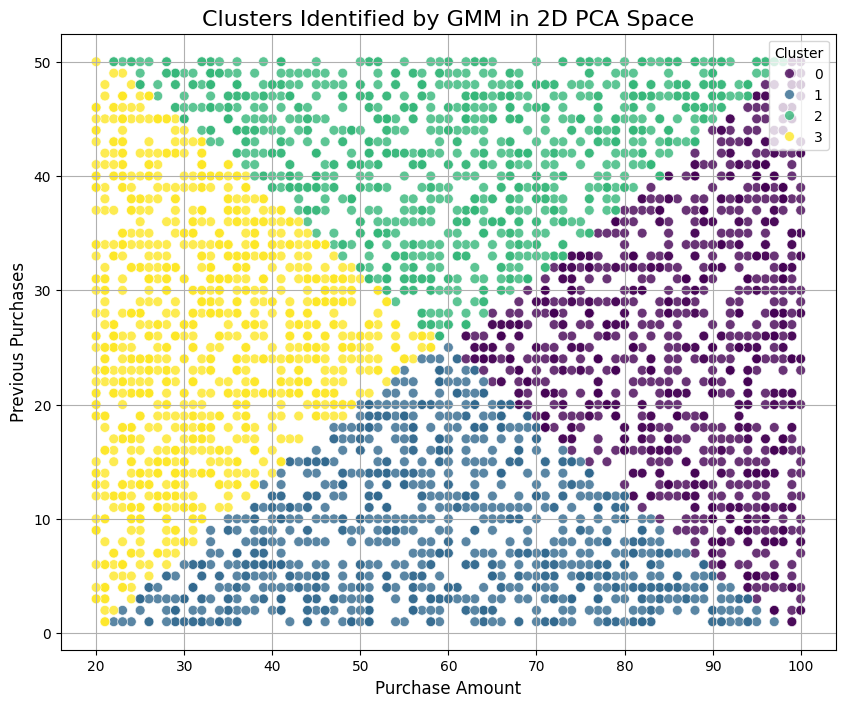

In [89]:
# Plot the clusters
plt.figure(figsize=(10, 8))
sn.scatterplot(
    x='Purchase Amount (USD)', 
    y='Previous Purchases', 
    hue='GMM Cluster', 
    palette='viridis', 
    data=data, 
    s=50, 
    alpha=0.8
)
plt.title('Clusters Identified by GMM in 2D PCA Space', fontsize=16)
plt.xlabel('Purchase Amount', fontsize=12)
plt.ylabel('Previous Purchases', fontsize=12)
plt.legend(title='Cluster')
plt.grid(True)
plt.show()
